In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [46]:
df = pd.read_excel('Выборка_ектб.xlsx', sheet_name = 0)
df

,ID,Мусор,Агрегатор,LN(Цена),Цена,Цена_перв,Прогноз_1,Прогноз_2,MAE,MAPE,...,Нежилые помещения на первом этаже,строение,Квартира угловая / торцевая,Способ продажи,Отделка,Название новостройки,"Корпус, строение",Тип участия,Срок сдачи,Запланирован снос
0,1_этажи,0,этажи,15.761421,7000000,7200000,7.357429e+06,7.315261e+06,-315260.780670,-0.045037,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2_этажи,0,этажи,16.231424,11200000,11400000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3_этажи,0,этажи,15.274126,4300000,4500000,4.955072e+06,4.923574e+06,-623574.436842,-0.145017,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4_этажи,0,этажи,15.555977,5700000,6000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5_этажи,0,этажи,14.557448,2100000,2200000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13331,8466_авито,1,авито,15.659230,6320000,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,переуступка,NaN,ЖК «Ботаника LIFE»,NaN,другое,Сдан 4 кв. 2023,NaN
13332,8467_авито,0,авито,15.147877,3790000,0,NaN,4.253817e+06,-463816.720736,-0.122379,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13333,8468_авито,0,авито,15.054464,3452000,0,NaN,3.777030e+06,-325030.387942,-0.094157,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13334,8469_авито,0,авито,15.176487,3900000,0,NaN,3.866094e+06,33905.795052,0.008694,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
df = df[df['Мусор'] == 0]
df = df[df['Выбросы'] == 0]
df = df[df['dup_res'] == 0]
df = df[df['Многоуровневость'] == 0]
df = df[df['Терраса'] == 0]
df.reset_index(drop = True , inplace = True )
df

,ID,Мусор,Агрегатор,LN(Цена),Цена,Цена_перв,Прогноз_1,Прогноз_2,MAE,MAPE,...,Нежилые помещения на первом этаже,строение,Квартира угловая / торцевая,Способ продажи,Отделка,Название новостройки,"Корпус, строение",Тип участия,Срок сдачи,Запланирован снос
0,1_этажи,0,этажи,15.761421,7000000,7200000,7.357429e+06,7.315261e+06,-315260.780670,-0.045037,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3_этажи,0,этажи,15.274126,4300000,4500000,4.955072e+06,4.923574e+06,-623574.436842,-0.145017,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6_этажи,0,этажи,15.483217,5300000,0,6.115291e+06,6.056768e+06,-756768.110306,-0.142786,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7_этажи,0,этажи,15.679591,6450000,6490000,6.246966e+06,6.173033e+06,276967.222331,0.042941,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15_этажи,0,этажи,15.823725,7450000,7500000,7.502204e+06,7.472315e+06,-22315.213466,-0.002995,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7885,8464_авито,0,авито,15.293700,4385000,0,5.291969e+06,5.297718e+06,-912718.329665,-0.208146,...,NaN,NaN,NaN,NaN,NaN,ЖК «Миллениум»,"Дом 5 (секц. А, Б)",другое,Сдан 2 кв. 2017,NaN
7886,8467_авито,0,авито,15.147877,3790000,0,NaN,4.253817e+06,-463816.720736,-0.122379,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7887,8468_авито,0,авито,15.054464,3452000,0,NaN,3.777030e+06,-325030.387942,-0.094157,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7888,8469_авито,0,авито,15.176487,3900000,0,NaN,3.866094e+06,33905.795052,0.008694,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
df['LN(Цена_кв.м)'] = np.log(df['Цена(кв.м)'])

In [49]:
df[['Этаж_1']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7890 entries, 0 to 7889
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Этаж_1  7890 non-null   int64
dtypes: int64(1)
memory usage: 61.8 KB


In [50]:
list(df.columns)

['ID',
 'Мусор',
 'Агрегатор',
 'LN(Цена)',
 'Цена',
 'Цена_перв',
 'Прогноз_1',
 'Прогноз_2',
 'MAE',
 'MAPE',
 'Цена(кв.м)_пр',
 'Анализ',
 'Исп',
 'Комм',
 'Цена(кв.м)',
 'Выбросы',
 'Выбросы_1',
 'Исп.1',
 'Комм.1',
 'Выбросы_2',
 'Исп.2',
 'Комм.2',
 'IsolationForest',
 'pca',
 'COPOD',
 'dup_all',
 'dup_1',
 'dup_2',
 'Пересечения',
 'dup(<=0.03)',
 'Пересечения(<=0.03)',
 'Пересечения(>0.03)',
 'dup_res',
 'ОПлощадь',
 'Оплощадь_перв',
 'Комнатность',
 'Комнатность_перв',
 'Этаж_1',
 'Этаж_2',
 'Этаж_3',
 'Этаж_4',
 'Этаж/Этажность',
 'Этажность_1',
 'Этажность_2',
 'Неточности',
 'Переменная этажность',
 'Р',
 'Р%',
 'Минжкх',
 'П',
 'Правдом',
 'П.1',
 'Этажность_перв',
 'ГП',
 'Неточности.1',
 'Р.1',
 'Минжкх.1',
 'Правдом.1',
 'Год постройки',
 'Аварийные',
 'Исп.3',
 'Ремонт_1',
 'Ремонт_перв',
 'Санузел',
 'Стены_1',
 'Стены_перв',
 'Адрес_перв',
 'Адрес',
 'Проверка номера дома',
 'Дом',
 'Дом_Ya',
 'Проверка',
 'Адрес_yandex',
 'Долгота',
 'Широта',
 'Сцепка_к',
 'Сцепка

# Перед тем, как делать бининг необходимо исключить первые и последние этажи, а также элитное жилье

In [51]:
df_1 = df[df['Этаж_2'] == 'средний']
df_1 = df_1[df_1['ЖК_БД'] == 'нет']
len(df_1)

6020

Средняя дисперсия цены внутри бинов: 0.0486017372878805


<Figure size 1000x600 with 0 Axes>

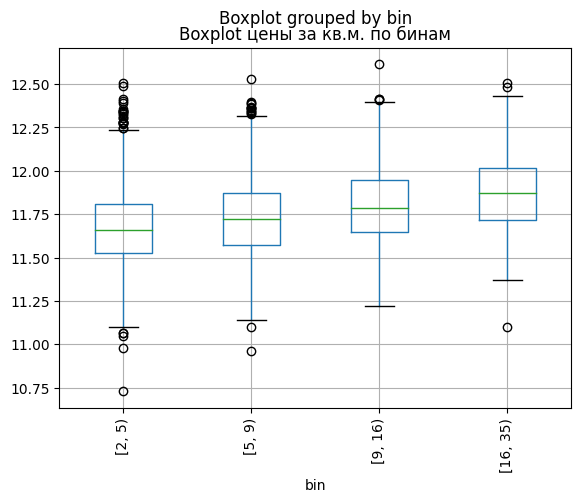

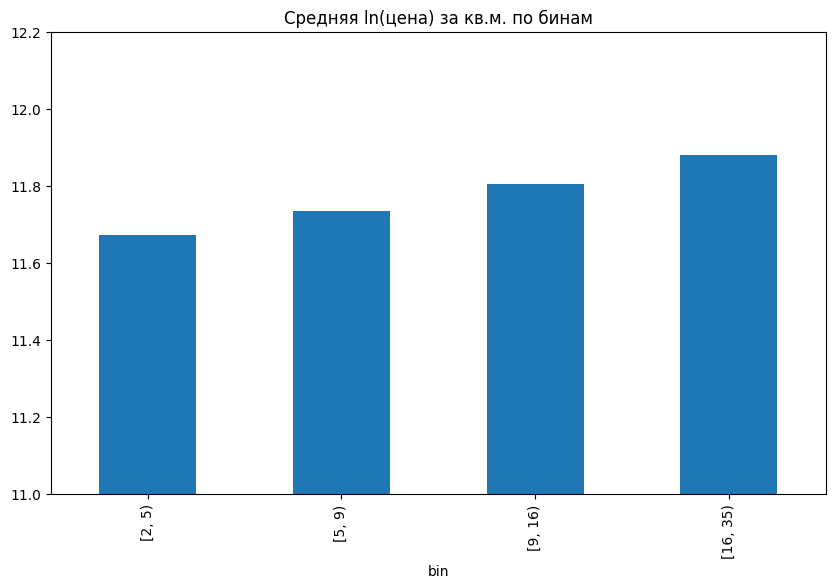

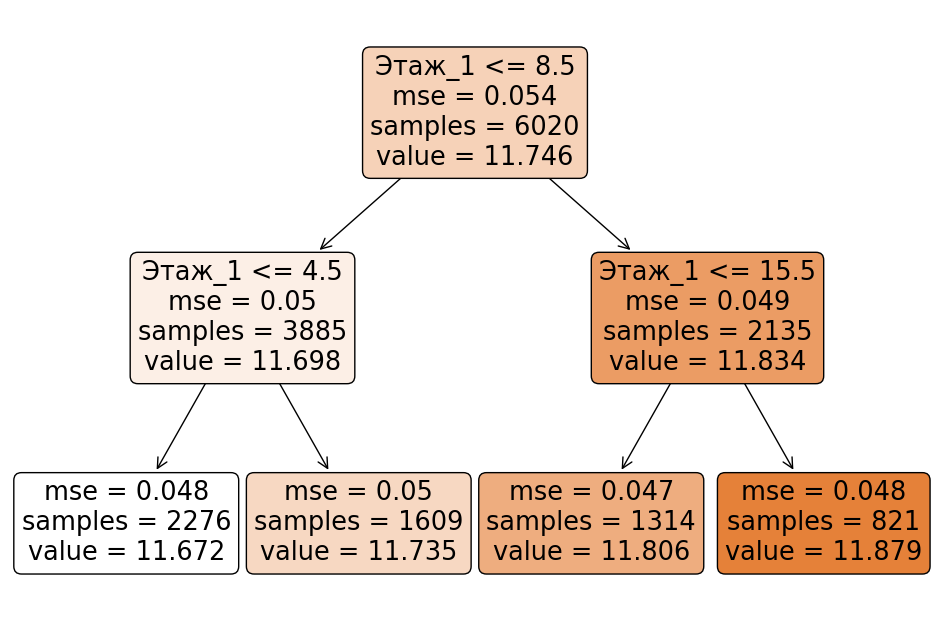

In [52]:
X = df_1[['Этаж_1']]
Y = df_1['LN(Цена_кв.м)']

# Обучение дерева решений (с автоматическим определением числа бинов)
model = DecisionTreeRegressor(max_depth = 2,           # от глубины дерева зависит количество бинов
                              min_samples_leaf = 10, 
                              random_state = 42
                             ) #настраиваемые параметры
model.fit(X, Y)

# Получение границ бинов из дерева решений (более корректный способ)
n_nodes = model.tree_.node_count
thresholds = []
for i in range(n_nodes):
    if model.tree_.children_left[i] != -1:  # только узлы, где происходит разбиение (-1 в узле нет разбиения)
        thresholds.append(int(model.tree_.threshold[i] + 0.5)) # вытаскиваем пороги разбиения с учетом округления

thresholds.sort() # сортируем границы
left_borders = [X['Этаж_1'].min()] + list(thresholds)
right_borders = list(thresholds) + [X['Этаж_1'].max() + 1]

# Создание бинов
bins = pd.cut(df_1['Этаж_1'], bins = left_borders + [right_borders[-1]], right = False, include_lowest = True)

df_1['bin'] = bins #.cat.codes + 1 # преобразование в числовое представление

# Оценка качества бининга (более адекватная оценка)
# Оцениваем однородность внутри бинов (низкая дисперсия - хорошо)
average_variance_in_bins = df_1.groupby('bin')['LN(Цена_кв.м)'].var().mean()
print(f'Средняя дисперсия цены внутри бинов: {average_variance_in_bins}')

# Визуализация
plt.figure(figsize = (10, 6))
df_1.boxplot(column = 'LN(Цена_кв.м)', by = 'bin')
plt.title('Boxplot цены за кв.м. по бинам')
plt.xticks(rotation = 90)
plt.show()

plt.figure(figsize = (10, 6))
df_1.groupby('bin')['LN(Цена_кв.м)'].mean().plot(kind = 'bar')
plt.title('Средняя ln(цена) за кв.м. по бинам')
plt.ylim((11, 12.2))
plt.show()

# Визуализация дерева
plt.figure(figsize = (12, 8))
plot_tree(model, feature_names = ['Этаж_1'], filled = True, rounded = True)
plt.show()

In [53]:
df_1['Этаж_4'].unique()

array(['этажи_2-5', 'этажи_11-25', 'этажи_6-10', 'более_25'], dtype=object)

In [54]:
df_1['bin'].unique()

[[2, 5), [9, 16), [5, 9), [16, 35)]
Categories (4, interval[int64, left]): [[2, 5) < [5, 9) < [9, 16) < [16, 35)]

<AxesSubplot:xlabel='Этаж_1'>

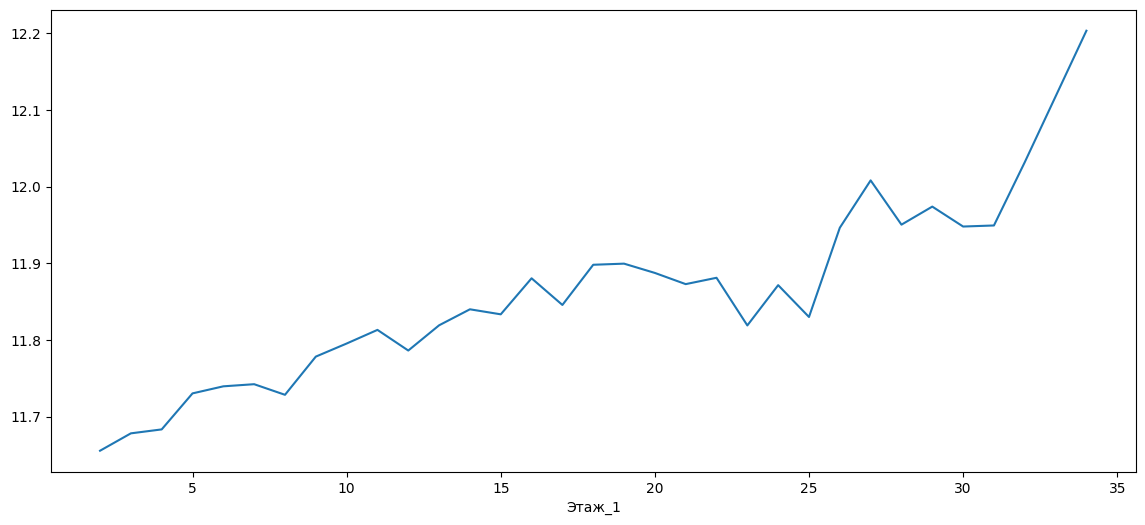

In [55]:
plt.figure(figsize = (14, 6))
df_1.groupby('Этаж_1')['LN(Цена_кв.м)'].mean().plot()